# "Me anticipo a las crecidas en nuestros ríos"

# Análisis y Visualización de Datos

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
caudal_LaCruz = pd.read_csv("./dataset/Datos_Caudales/RioLaCruz.csv", parse_dates = True, index_col="date_time")

In [6]:
caudal_LaCruz.head()

,Caudal_m3/s
date_time,
2018-11-26 00:00:00,0.056
2018-11-26 00:10:00,0.651
2018-11-26 00:20:00,4.800
2018-11-26 00:30:00,3.085
2018-11-26 00:40:00,0.651


## Previsualización de datos

In [7]:
caudal_LaCruz.describe()

,Caudal_m3/s
count,72877.000000
mean,0.702274
std,5.448700
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,182.026000


## Grafico de datos

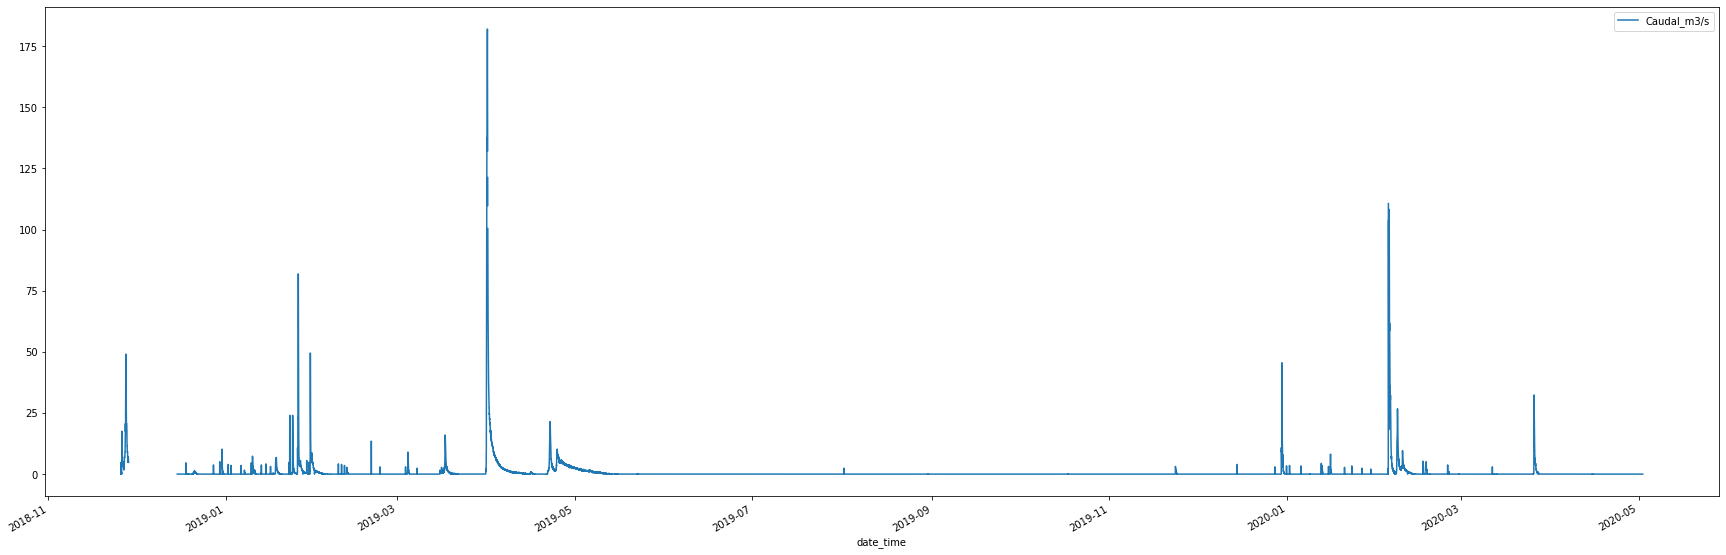

In [8]:
caudal_LaCruz.plot(figsize=(30,10))

#  Cargamos los datos

In [9]:
caudal_sta_rosa = pd.read_csv("./dataset/Datos_Caudales/RioSantaRosa.csv", parse_dates = True, index_col="date_time")
caudal_sta_rosa.columns = ['Caudal_ms/3']
#caudal_sta_rosa.plot(figsize=(30,10))

In [8]:
caudal_quillinzo = pd.read_csv("./dataset/Datos_Caudales/RioQuillinzo.csv", parse_dates = True, index_col="date_time")
caudal_quillinzo.columns = ['Caudal_ms/3']
#caudal_quillinzo.plot(figsize=(30,10))

In [9]:
caudal_embalse = pd.read_csv("./dataset/Datos_Caudales/Caudal_Embalse.csv", parse_dates=['fecha'])
caudal_embalse = caudal_embalse.drop(['mes','dias_al_mes','anio'],axis=1)
caudal_embalse.columns = ['fecha','Caudal_ms/3']
#caudal_embalse
#caudal_embalse.plot(figsize=(30,10))

In [5]:
meteo_StaRosa = pd.read_csv("./dataset/Datos_Meteorologicos/APRHi - Sta Rosa de Calamuchita.csv", parse_dates=['date_time'])
#meteo_StaRosa


In [6]:
meteo_StaRosa.columns

Index(['Codigo', 'Estacion', 'dia', 'mes', 'anio', 'date', 'Hora', 'date_time',
       'BUI_[adim]', 'Temperatura_[Celsius]', 'HumedadRel_[porc]',
       'Presion_[hPa]', 'DireccionViento_[grad]', 'VelocidadViento_[KpH]',
       'RadiacionSolar_[WpM2]', 'Lluvia_[mm]', 'RafagaViento_[KpH]',
       'ISI_[adim]', 'FaseLunarAmanecerOcaso_[adim]',
       'Alertas_Heladas_Agroapp_[adim]', 'Panel_Solar_[adim]',
       'SenialGPRS_[ASU]', 'IndicePeligroIncendios_[adim]', 'FFMC_[adim]',
       'DMC_[adim]', 'DC_[adim]', 'NivelBateria_[V]'],
      dtype='object')

In [64]:
meteo_Yacanto = pd.read_csv("./dataset/Datos_Meteorologicos/APRHi - Yacanto Norte.csv", parse_dates=True,index_col='date')
#meteo_Yacanto

In [13]:
meteo_VillaDique = pd.read_csv("./dataset/Datos_Meteorologicos/AgriculturaCba - Villa del Dique.csv", parse_dates=['date'])
#meteo_VillaDique

## CONSIGNA:

## 1. Estadísticos descriptivos

  1. Para comenzar, calcular el rango de las variables de la estación "APRHi - Sta Rosa de Calamuchita", "BDHI_LaFlorida", "Caudal_Embalse" y "RioSantaRosa".


In [14]:
print("Embalse: Caudal Minimo: {}, Caudal Maximo: {}".format(caudal_embalse['Caudal_ms/3'].min(),caudal_embalse['Caudal_ms/3'].max()))
print("Rio Quillinzo: Caudal Minimo: {}, Caudal Maximo: {}".format(caudal_quillinzo['Caudal_ms/3'].min(),caudal_quillinzo['Caudal_ms/3'].max()))
print("Rio Sta Rosa: Caudal Minimo: {}, Caudal Maximo: {}".format(caudal_sta_rosa['Caudal_ms/3'].min(),caudal_sta_rosa['Caudal_ms/3'].max()))

Embalse: Caudal Minimo: 0.84, Caudal Maximo: 227.22
Rio Quillinzo: Caudal Minimo: 1.4887060019999998, Caudal Maximo: 1378.847189
Rio Sta Rosa: Caudal Minimo: 0.0, Caudal Maximo: 1112.134641


  2. ¿En los archivos anteriores existen valores faltantes? Cuantificarlos.

In [15]:
nulos_embalse = caudal_embalse['Caudal_ms/3'].isna().sum()
nulos_quillinzo = caudal_quillinzo['Caudal_ms/3'].isna().sum()
nulos_sta_rosa = caudal_sta_rosa['Caudal_ms/3'].isna().sum()

print("Cantidad de Registros y de Registros Nulos por archivo:\n{}, {}\n{}, {}\n{}, {}".format(
    caudal_embalse.shape[0],nulos_embalse,caudal_quillinzo.shape[0],nulos_quillinzo,caudal_sta_rosa.shape[0],nulos_sta_rosa))

Cantidad de Registros y de Registros Nulos por archivo:
1260, 0
69778, 0
71246, 5


  3. Realizar Box-Blot de cada variable en para las estaciones "APRHi - Sta  Rosa de Calamuchita", "APRHi - Yacanto Norte" y "AgriculturaCba - Villa del Dique".

In [16]:
meteo_StaRosa.columns

Index(['Codigo', 'Estacion', 'dia', 'mes', 'anio', 'date', 'Hora',
       'BUI_[adim]', 'Temperatura_[Celsius]', 'HumedadRel_[porc]',
       'Presion_[hPa]', 'DireccionViento_[grad]', 'VelocidadViento_[KpH]',
       'RadiacionSolar_[WpM2]', 'Lluvia_[mm]', 'RafagaViento_[KpH]',
       'ISI_[adim]', 'FaseLunarAmanecerOcaso_[adim]',
       'Alertas_Heladas_Agroapp_[adim]', 'Panel_Solar_[adim]',
       'SenialGPRS_[ASU]', 'IndicePeligroIncendios_[adim]', 'FFMC_[adim]',
       'DMC_[adim]', 'DC_[adim]', 'NivelBateria_[V]'],
      dtype='object')

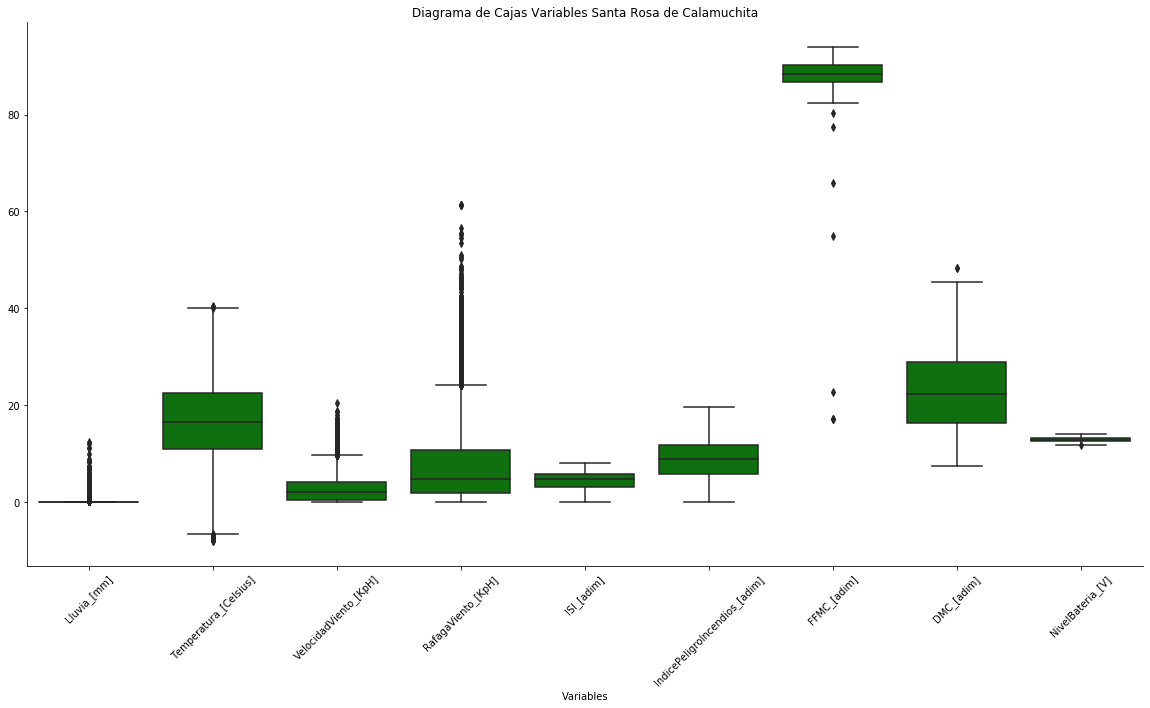

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data=meteo_StaRosa[['Lluvia_[mm]', 'Temperatura_[Celsius]','VelocidadViento_[KpH]','RafagaViento_[KpH]','ISI_[adim]','IndicePeligroIncendios_[adim]' 
                                ,'FFMC_[adim]','DMC_[adim]','NivelBateria_[V]']],color='green')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Santa Rosa de Calamuchita')
plt.xticks(rotation=45)
sns.despine()

In [18]:
meteo_Yacanto.columns

Index(['Codigo', 'Estacion', 'dia', 'mes', 'anio', 'date', 'Hora', 'date_time',
       'BUI_[adim]', 'Temperatura_[Celsius]', 'HumedadRel_[porc]',
       'Presion_[hPa]', 'DireccionViento_[grad]', 'VelocidadViento_[KpH]',
       'RadiacionSolar_[WpM2]', 'Lluvia_[mm]', 'RafagaViento_[KpH]',
       'ISI_[adim]', 'FaseLunarAmanecerOcaso_[adim]',
       'Alertas_Heladas_Agroapp_[adim]', 'Panel_Solar_[adim]',
       'SenialGPRS_[ASU]', 'IndicePeligroIncendios_[adim]', 'FFMC_[adim]',
       'DMC_[adim]', 'DC_[adim]', 'NivelBateria_[V]'],
      dtype='object')

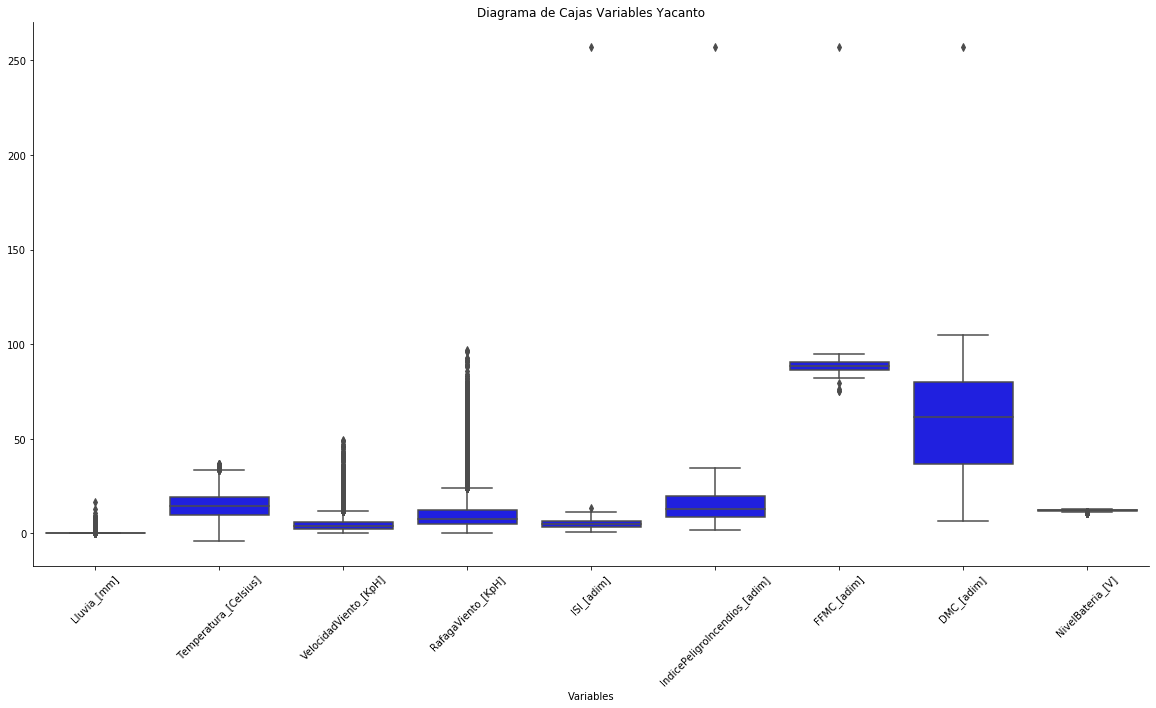

In [19]:

plt.figure(figsize=(20,10))
sns.boxplot(data=meteo_Yacanto[['Lluvia_[mm]','Temperatura_[Celsius]','VelocidadViento_[KpH]','RafagaViento_[KpH]','ISI_[adim]','IndicePeligroIncendios_[adim]' 
                                ,'FFMC_[adim]','DMC_[adim]','NivelBateria_[V]']],color='blue')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Yacanto')
plt.xticks(rotation=45)
sns.despine()

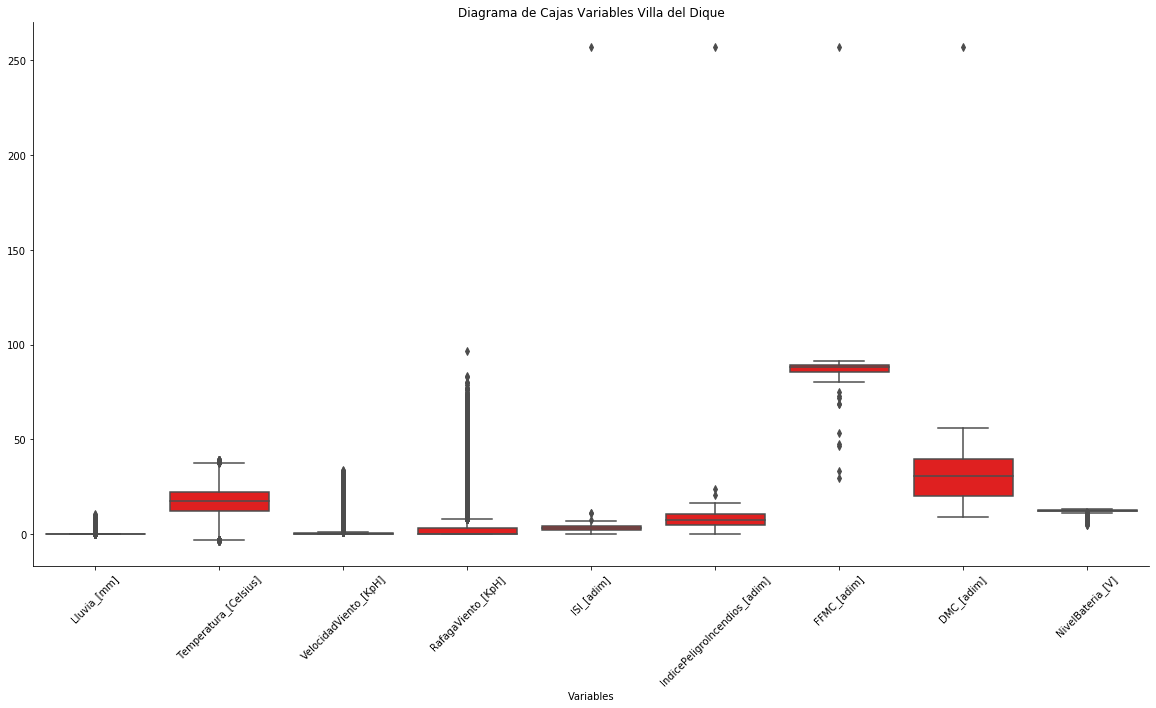

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(data=meteo_VillaDique[['Lluvia_[mm]','Temperatura_[Celsius]','VelocidadViento_[KpH]','RafagaViento_[KpH]','ISI_[adim]','IndicePeligroIncendios_[adim]' 
                                ,'FFMC_[adim]','DMC_[adim]','NivelBateria_[V]']],color='red')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Villa del Dique')
plt.xticks(rotation=45)
sns.despine()

  4. ¿Encuentran outliers en estas variables?

In [21]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_salarios_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_salarios_outlier]

In [22]:
clean_outliers(meteo_StaRosa,'NivelBateria_[V]').shape[0]

92076

In [23]:
meteo_StaRosa.shape[0] - clean_outliers(meteo_StaRosa,'NivelBateria_[V]').shape[0]

395

In [24]:
['Temperatura_[Celsius]','VelocidadViento_[KpH]','RafagaViento_[KpH]','ISI_[adim]','IndicePeligroIncendios_[adim]','FFMC_[adim]','DMC_[adim]','NivelBateria_[V]']

['Temperatura_[Celsius]',
 'VelocidadViento_[KpH]',
 'RafagaViento_[KpH]',
 'ISI_[adim]',
 'IndicePeligroIncendios_[adim]',
 'FFMC_[adim]',
 'DMC_[adim]',
 'NivelBateria_[V]']

In [25]:
def n_outliers(df):
  cols = df.columns
  list_of_col = [
      'Temperatura_[Celsius]','VelocidadViento_[KpH]','RafagaViento_[KpH]','ISI_[adim]','IndicePeligroIncendios_[adim]' 
      ,'FFMC_[adim]','DMC_[adim]','NivelBateria_[V]'
  ]
  for column in cols:
    if column in list_of_col:
      result = df.shape[0] - clean_outliers(df,column).shape[0]
      print(str(result)+' outliers for column '+column)
  return None

In [26]:
n_outliers(meteo_StaRosa)

303 outliers for column Temperatura_[Celsius]
1879 outliers for column VelocidadViento_[KpH]
2332 outliers for column RafagaViento_[KpH]
92409 outliers for column ISI_[adim]
92409 outliers for column IndicePeligroIncendios_[adim]
92413 outliers for column FFMC_[adim]
92409 outliers for column DMC_[adim]
395 outliers for column NivelBateria_[V]


In [27]:
n_outliers(meteo_Yacanto)

368 outliers for column Temperatura_[Celsius]
2331 outliers for column VelocidadViento_[KpH]
3082 outliers for column RafagaViento_[KpH]
107732 outliers for column ISI_[adim]
107732 outliers for column IndicePeligroIncendios_[adim]
107732 outliers for column FFMC_[adim]
107732 outliers for column DMC_[adim]
868 outliers for column NivelBateria_[V]


In [28]:
n_outliers(meteo_VillaDique)

428 outliers for column Temperatura_[Celsius]
4579 outliers for column VelocidadViento_[KpH]
4428 outliers for column RafagaViento_[KpH]
100486 outliers for column ISI_[adim]
100486 outliers for column IndicePeligroIncendios_[adim]
100486 outliers for column FFMC_[adim]
100486 outliers for column DMC_[adim]
549 outliers for column NivelBateria_[V]


## 2. Agregación de datos

  1. Acumulen anualmente los datos de *lluvia* (Precipitación Total Anual o PTA) en "BDHI_LaFlorida", grafiquenlos y determine si la serie es estacionaria (es decir, ¿Hay tendencia?).
  2. Determinar la precipitación máxima diaria anual (PMDA) en "BDHI_LaFlorida", grafiquenlos y determine si la serie es estacionaria (es decir, ¿Hay tendencia?).
  3. Acumulen anualmente los datos de *caudal* en "Caudal_Embalse", grafiquenlos y determine si la serie es estacionaria. Ojo que los valores en Embalse son medios mensuales.
  4. ¿Existe alguna correlación entre lo obtenido en 1 y 3?
  5. En las estaciones "APRHi - Sta Rosa de Calamuchita", "APRHi - Yacanto Norte" y "AgriculturaCba - Villa del Dique", ¿existe alguna correlación mayor a 0.5 (en términos absolutos) entre lluvia y alguna otra variable meteorológica? 
  6. ¿Las series de lluvia de las estaciones en 5, responden a una distribución Normal?


In [29]:
def monthdelta(date, delta):
    m, y = (date.month+delta) % 12, date.year + ((date.month)+delta-1) // 12
    if not m: m = 12
    d = min(date.day, [31,
        29 if y%4==0 and not y%400==0 else 28,31,30,31,30,31,31,30,31,30,31][m-1])
    new_date = (date.replace(day=d,month=m, year=y))
    return new_date.strftime('%Y-%m-%d')

In [30]:
meteo_LaFlorida = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_PronosticoCaudales/master/dataset/Datos_Meteorologicos/BDHI_LaFlorida.csv",parse_dates=['Fecha'])
meteo_LaFlorida.columns = ['fechas','lluvias']
meteo_LaFlorida['fechas'].apply(lambda x: monthdelta(x,6))
meteo_LaFlorida.head()

,fechas,lluvias
0,1958-01-01,5.0
1,1958-01-02,0.0
2,1958-01-03,0.0
3,1958-01-04,7.2
4,1958-01-05,0.0


In [31]:
df = meteo_LaFlorida.groupby(meteo_LaFlorida.fechas.dt.year).sum()
df

,lluvias
fechas,
1958,852.9
1959,630.8
1960,744.2
1961,994.2
1962,732.2
...,...
2014,1371.6
2015,1232.0
2016,1209.5


No handles with labels found to put in legend.


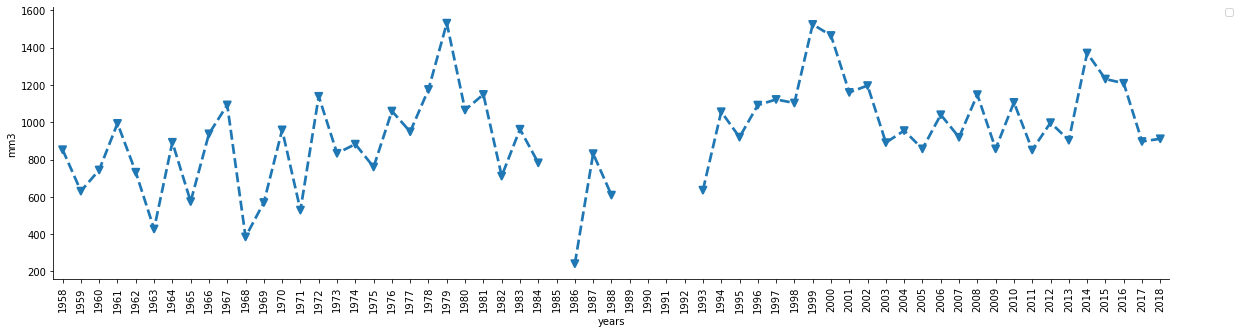

In [32]:
plt.figure(figsize=(20,5))
sns.pointplot(x=meteo_LaFlorida.fechas.dt.year,y=meteo_LaFlorida.lluvias,
              estimator=sum,
            dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xlabel('years')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

No handles with labels found to put in legend.


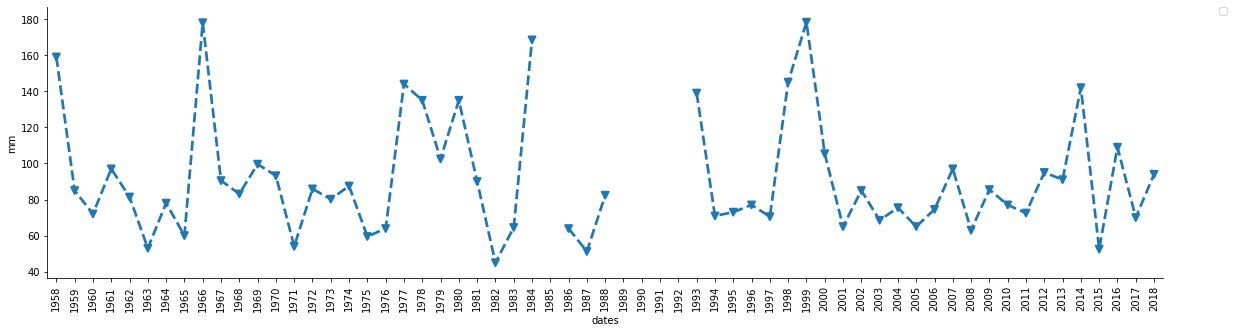

In [33]:
plt.figure(figsize=(20,5))
sns.pointplot(x=meteo_LaFlorida.fechas.dt.year,y=meteo_LaFlorida.lluvias,
              estimator=max,
              dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xlabel('dates')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()


No handles with labels found to put in legend.


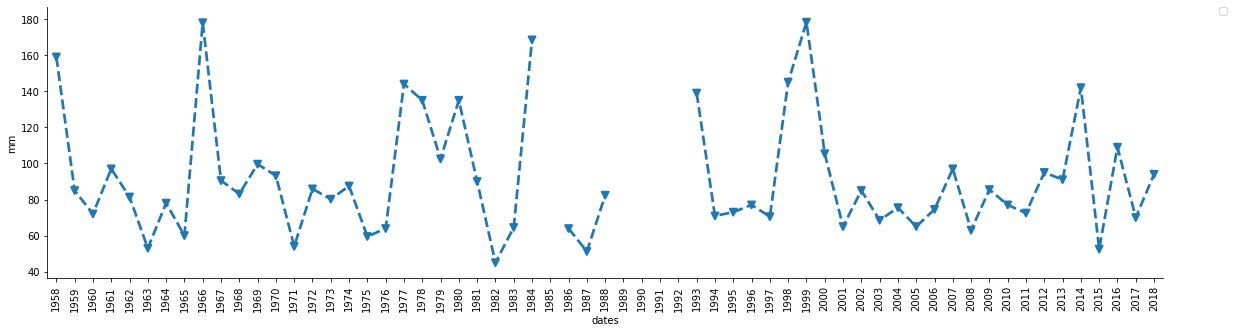

In [34]:
plt.figure(figsize=(20,5))
sns.pointplot(x=meteo_LaFlorida.fechas.dt.year,y=meteo_LaFlorida.lluvias,
              estimator=max,
            dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xlabel('dates')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

In [35]:
df = meteo_LaFlorida.groupby(meteo_LaFlorida.fechas.dt.month).sum()
df

,lluvias
fechas,
1,9312.5
2,7770.1
3,7805.7
4,3892.7
5,1168.3
6,590.6
7,465.5
8,637.7
9,1813.3


In [36]:
df= caudal_embalse.groupby(caudal_embalse.fecha.dt.year)
df.sum()


,Caudal_ms/3
fecha,
1914,262.00
1915,404.90
1916,72.10
1917,138.60
1918,408.80
...,...
2014,590.28
2015,484.04
2016,258.09


No handles with labels found to put in legend.


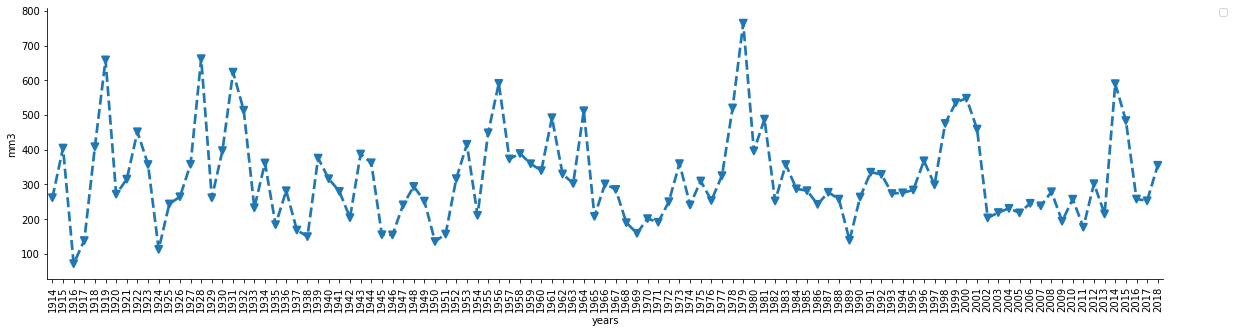

In [37]:
plt.figure(figsize=(20,5))
sns.pointplot(x=caudal_embalse.fecha.dt.year,y=caudal_embalse['Caudal_ms/3'],
              estimator=sum,
            dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xlabel('years')
plt.ylabel('mm3')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

No handles with labels found to put in legend.


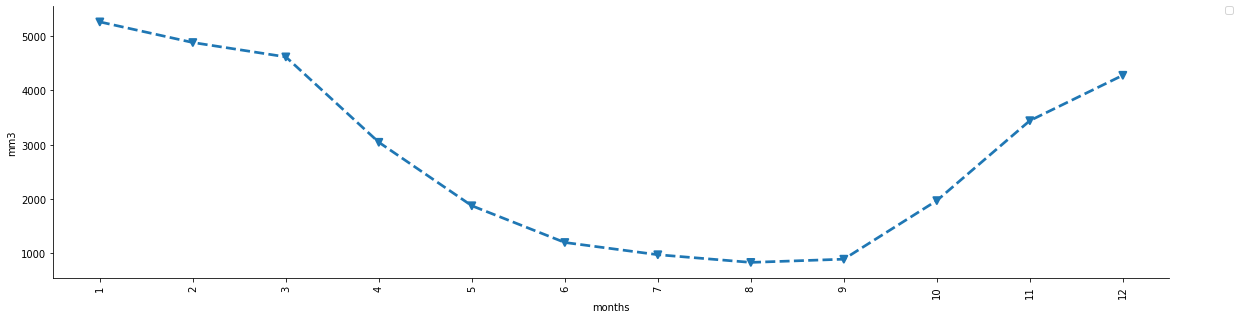

In [38]:
plt.figure(figsize=(20,5))
sns.pointplot(x=caudal_embalse.fecha.dt.month,y=caudal_embalse['Caudal_ms/3'],
              estimator=sum,
            dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xlabel('months')
plt.ylabel('mm3')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()


No handles with labels found to put in legend.
No handles with labels found to put in legend.


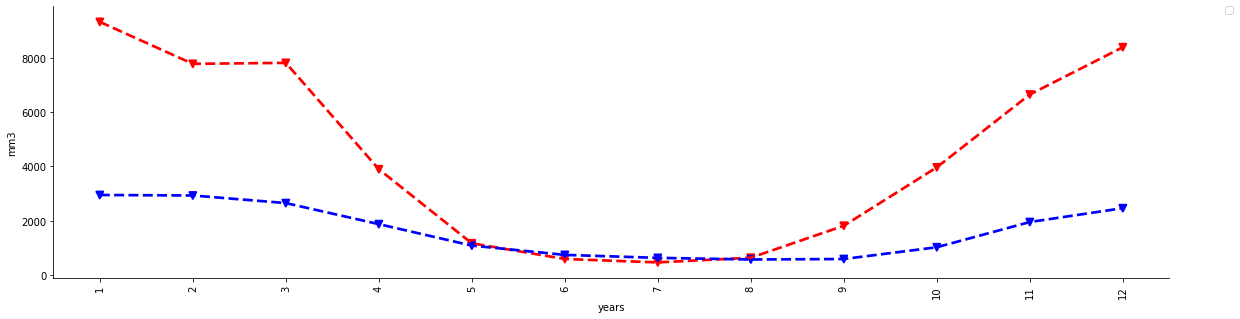

In [39]:
data_embalse = caudal_embalse[caudal_embalse['fecha'] >= '1958-01-01']

plt.figure(figsize=(20,5))
sns.pointplot(x=meteo_LaFlorida.fechas.dt.month,y=meteo_LaFlorida.lluvias,
              estimator=sum,
            dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2,color='red')
plt.xlabel('years')
plt.ylabel('mm3')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()


sns.pointplot(x=data_embalse.fecha.dt.month,y=data_embalse['Caudal_ms/3'],
              estimator=sum,
            dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2, color='blue')
plt.xlabel('years')
plt.ylabel('mm3')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

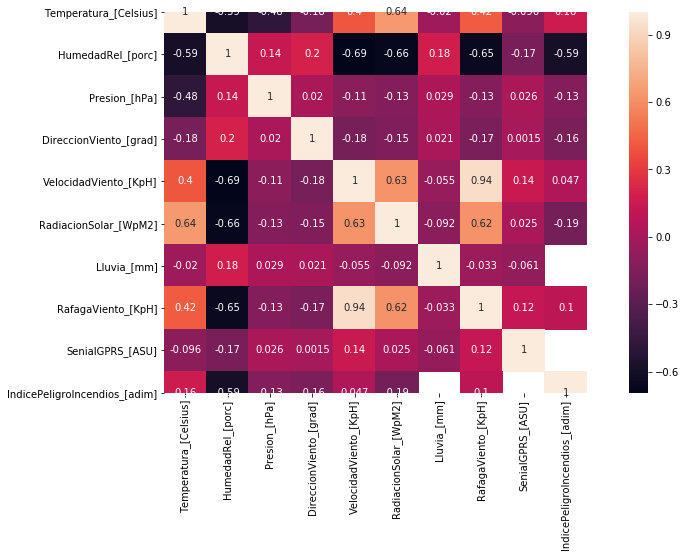

In [40]:
df =meteo_StaRosa.loc[:, ['Temperatura_[Celsius]',	'HumedadRel_[porc]',	'Presion_[hPa]',	'DireccionViento_[grad]',	'VelocidadViento_[KpH]',	'RadiacionSolar_[WpM2]',	'Lluvia_[mm]',	'RafagaViento_[KpH]',	'SenialGPRS_[ASU]',	'IndicePeligroIncendios_[adim]']]

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(method='spearman'), square = True, annot =True )


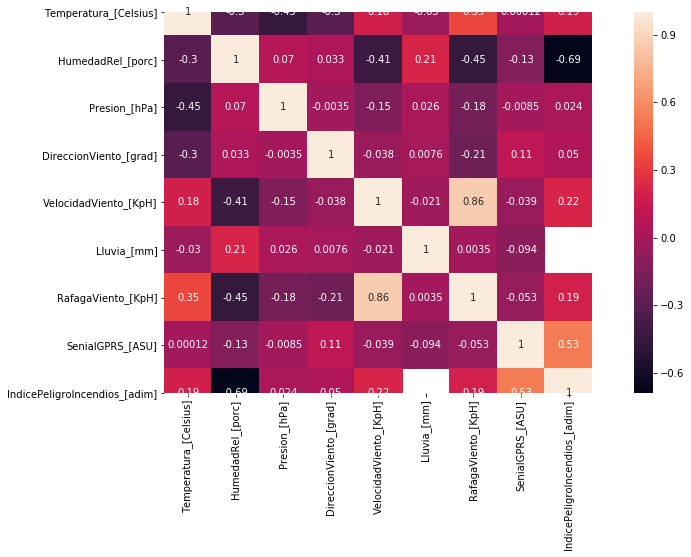

In [41]:
df =meteo_Yacanto.loc[:, ['Temperatura_[Celsius]',	'HumedadRel_[porc]',	'Presion_[hPa]',	'DireccionViento_[grad]',	'VelocidadViento_[KpH]',	'Lluvia_[mm]',	'RafagaViento_[KpH]',	'SenialGPRS_[ASU]',	'IndicePeligroIncendios_[adim]']]

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(method='spearman'), square = True, annot =True )

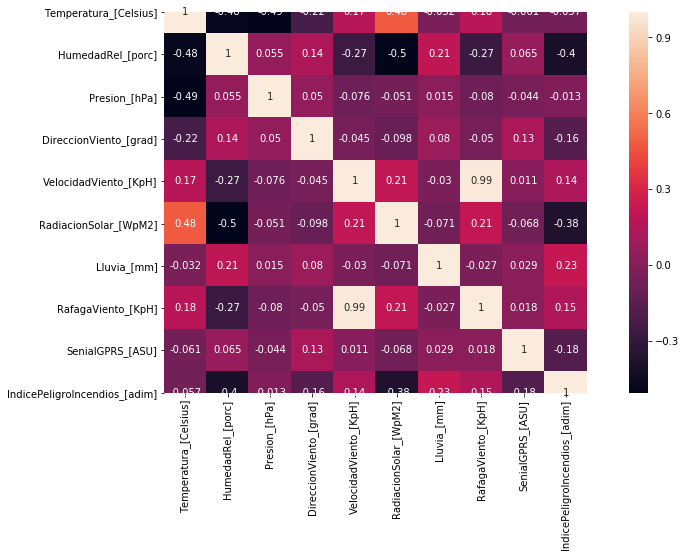

In [42]:
df =meteo_VillaDique.loc[:, ['Temperatura_[Celsius]',	'HumedadRel_[porc]',	'Presion_[hPa]',	'DireccionViento_[grad]',	'VelocidadViento_[KpH]',	'RadiacionSolar_[WpM2]',	'Lluvia_[mm]',	'RafagaViento_[KpH]',	'SenialGPRS_[ASU]',	'IndicePeligroIncendios_[adim]']]

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(method='spearman'), square = True, annot =True )

In [61]:
meteo_Yacanto

,Codigo,Estacion,dia,mes,anio,Hora,BUI_[adim],Temperatura_[Celsius],HumedadRel_[porc],Presion_[hPa],...,ISI_[adim],FaseLunarAmanecerOcaso_[adim],Alertas_Heladas_Agroapp_[adim],Panel_Solar_[adim],SenialGPRS_[ASU],IndicePeligroIncendios_[adim],FFMC_[adim],DMC_[adim],DC_[adim],NivelBateria_[V]
date_time,,,,,,,,,,,,,,,,,,,,,
5/1/2018 0:00,30135,APRHi - Yacanto Norte,1,5,2018,0:00,NaN,9.61,100.00,888.125,...,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,11.9960
5/1/2018 0:10,30135,APRHi - Yacanto Norte,1,5,2018,0:10,NaN,9.55,100.00,888.750,...,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,11.9960
5/1/2018 0:20,30135,APRHi - Yacanto Norte,1,5,2018,0:20,NaN,9.49,100.00,890.000,...,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,11.9960
5/1/2018 0:30,30135,APRHi - Yacanto Norte,1,5,2018,0:30,NaN,9.55,100.00,890.000,...,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,11.9747
5/1/2018 0:40,30135,APRHi - Yacanto Norte,1,5,2018,0:40,NaN,9.53,100.00,888.125,...,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,11.9747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/18/2020 17:10,30135,APRHi - Yacanto Norte,18,5,2020,17:10,NaN,23.07,26.69,881.250,...,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,12.3576
5/18/2020 17:20,30135,APRHi - Yacanto Norte,18,5,2020,17:20,NaN,22.76,27.62,880.625,...,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,12.3150
5/18/2020 17:30,30135,APRHi - Yacanto Norte,18,5,2020,17:30,NaN,22.40,27.90,881.250,...,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,12.3150


In [66]:
import scipy

# Test Normalidad Yacanto
yacanto = meteo_Yacanto[['Lluvia_[mm]']].resample('1D').sum()
z1,p1 = scipy.stats.normaltest(yacanto, nan_policy='omit')
print('El test de normalidad para las lluvas en Yacanto es negativo, ya que su pValue es de {}'.format(p1))

El test de normalidad para las lluvas en Yacanto es negativo, ya que su pValue es de [5.84443644e-174]


In [108]:
# Prueba de normalidad para villa del dique
vdd = meteo_VillaDique['Lluvia_[mm]'].resample('1D').sum()
z2,p2 = scipy.stats.normaltest(vdd, nan_policy='omit')
print('El test de normalidad para las lluvas en Villa Del Dique es negativo, ya que su pValue es de {}'.format(p2))

El test de normalidad para las lluvas en Villa Del Dique es negativo, ya que su pValue es de 3.1376036702818986e-184


In [4]:
# Prueba de normalidad para Sta Rosa
# meteo_StaRosa = meteo_StaRosa.set_index('date')
sta_rosa = meteo_StaRosa.set_index('date_time')['Lluvia_[mm]'].resample('1D').sum()
z3,p3 = scipy.stats.normaltest(sta_rosa, nan_policy='omit')
print('pValues indicating normality: {}'.format(p3))

NameError: name 'meteo_StaRosa' is not defined

In [86]:
meteo_StaRosa


,Codigo,Estacion,dia,mes,anio,Hora,date_time,BUI_[adim],Temperatura_[Celsius],HumedadRel_[porc],...,ISI_[adim],FaseLunarAmanecerOcaso_[adim],Alertas_Heladas_Agroapp_[adim],Panel_Solar_[adim],SenialGPRS_[ASU],IndicePeligroIncendios_[adim],FFMC_[adim],DMC_[adim],DC_[adim],NivelBateria_[V]
date,,,,,,,,,,,,,,,,,,,,,
8/15/2018,30234,APRHi - Sta Rosa de Calamuchita,15,8.0,2018.0,13:00,08/15/2018 13:00,NaN,18.79,23.16,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,12.4427
8/15/2018,30234,APRHi - Sta Rosa de Calamuchita,15,8.0,2018.0,13:20,08/15/2018 13:20,NaN,18.43,22.92,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,13.1446
8/15/2018,30234,APRHi - Sta Rosa de Calamuchita,15,8.0,2018.0,13:30,08/15/2018 13:30,NaN,18.01,24.00,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,13.1446
8/15/2018,30234,APRHi - Sta Rosa de Calamuchita,15,8.0,2018.0,13:40,08/15/2018 13:40,NaN,18.19,23.98,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,13.1658
8/15/2018,30234,APRHi - Sta Rosa de Calamuchita,15,8.0,2018.0,13:50,08/15/2018 13:50,NaN,18.31,23.17,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,13.1658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/18/2020,30234,APRHi - Sta Rosa de Calamuchita,18,5.0,2020.0,17:20,05/18/2020 17:20,NaN,27.00,22.09,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,12.8255
5/18/2020,30234,APRHi - Sta Rosa de Calamuchita,18,5.0,2020.0,17:30,05/18/2020 17:30,NaN,26.68,22.29,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,12.8255
5/18/2020,30234,APRHi - Sta Rosa de Calamuchita,18,5.0,2020.0,17:40,05/18/2020 17:40,NaN,26.24,22.59,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,12.8042
